<a href="https://colab.research.google.com/github/ykevinsh/machine-learnig-/blob/main/proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESION LINEAL 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/ykevinsh/machine-learnig-/main/glass.csv")

In [6]:
print(df.tail())
print(df.shape)   

          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     6
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     6
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     6
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     6
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     6
(214, 10)


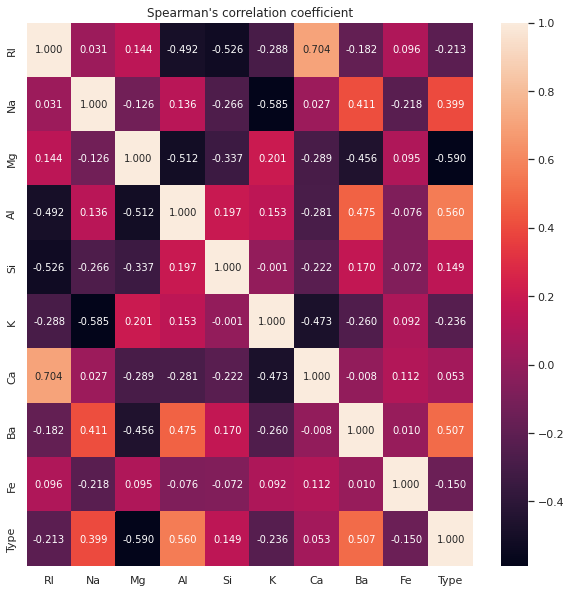

In [7]:
corr_spearman = df.corr(method = 'spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_spearman, annot = True, fmt=".3f").set_title(
    "Spearman's correlation coefficient")
plt.show()

In [ ]:
#Aqui elegiremos 2 campos: Porcentaje de personas de estatos bajos, y cantidad promedio de habitaciones por vivienda.
X = df[['Si', 'Ca']]
Y = df['RI']

# Dividamos la muestra en el subconjunto de entrenamiento y el subconjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 2)
(86, 2)
(128,)
(86,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =1.989324311634315e-06
Pruebas: MSE =1.5928929411832555e-06


,valor_real,prediccion,diferencia
0,1.51966,1.519514,0.000146
1,1.51778,1.518077,-0.000297
2,1.51409,1.516137,-0.002047
3,1.51820,1.517429,0.000771
4,1.51793,1.517682,0.000248
5,1.51514,1.515969,-0.000829
6,1.51640,1.518943,-0.002543
7,1.51768,1.517073,0.000607
8,1.51743,1.516590,0.000840
9,1.51934,1.518380,0.000960


# **Regresión polinomial**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [ ]:
X = df[['RI', 'Si']]
Y = df['Ca']

# Dividamos la muestra en el subconjunto de entrenamiento y el subconjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 2)
(86, 2)
(128,)
(86,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.6240793001544165
Pruebas: MSE =0.42768240697352244


,valor_real,prediccion,diferencia
0,9.00,9.148222,-0.148222
1,9.02,8.849575,0.170425
2,7.08,6.603967,0.476033
3,9.42,9.586981,-0.166981
4,8.43,8.704263,-0.274263
5,8.39,8.039727,0.350273
6,9.45,8.094380,1.355620
7,8.54,8.910062,-0.370062
8,8.17,8.749847,-0.579847
9,8.89,9.397005,-0.507005


In [ ]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.5038319784339005
Pruebas: MSE =0.3984886947746262


,valor_real,prediccion,diferencia
0,9.00,8.833510,0.166490
1,9.02,8.772064,0.247936
2,7.08,7.448550,-0.368550
3,9.42,9.442682,-0.022682
4,8.43,8.614201,-0.184201
5,8.39,8.232349,0.157651
6,9.45,8.225035,1.224965
7,8.54,8.835508,-0.295508
8,8.17,8.705008,-0.535008
9,8.89,9.191166,-0.301166


In [ ]:
# Polinomio de grado 3: 
poly_model = LinearRegression(normalize = True)
poly = PolynomialFeatures(degree=3)

# Transforma las muestras de prueba y entrenamiento a grado 3
Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)


# Evalua el modelo con la muestra de entrenamiento
poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento Grado = 3: MSE ="+str(MSE))

# Evalue el modelo con la muestra de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas Grado = 3: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

# Ahora genera un modelo lineal con Polinomio de grado 4:
poly_model = LinearRegression(normalize = True)
poly = PolynomialFeatures(degree=4)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)
poly_model = LinearRegression(normalize = True)
poly = PolynomialFeatures(degree=4)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento Grado = 4: MSE ="+str(MSE))

# Evalue el modelo con la muestra de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas Grado = 4: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)


Entrenamiento Grado = 3: MSE =0.4937032430512459
Pruebas Grado = 3: MSE =0.48520751570951415
Entrenamiento Grado = 4: MSE =0.47694812312691365
Pruebas Grado = 4: MSE =0.4898569113548928


,valor_real,prediccion,diferencia
0,9.00,8.892656,0.107344
1,9.02,8.672927,0.347073
2,7.08,7.562370,-0.482370
3,9.42,9.392911,0.027089
4,8.43,8.558760,-0.128760
5,8.39,8.385656,0.004344
6,9.45,8.258140,1.191860
7,8.54,8.724676,-0.184676
8,8.17,8.619824,-0.449824
9,8.89,9.077640,-0.187640


In [ ]:
# Ahora genera un modelo lineal con Polinomio de grado 5:
poly_model = LinearRegression(normalize = True)
poly = PolynomialFeatures(degree=5)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)
poly_model = LinearRegression(normalize = True)
poly = PolynomialFeatures(degree=4)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento Grado = 5: MSE ="+str(MSE))

# Evalue el modelo con la muestra de prueba
y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas Grado = 5: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento Grado = 5: MSE =0.39732966260290703
Pruebas Grado = 5: MSE =5.199661929109206


,valor_real,prediccion,diferencia
0,9.00,9.157227,-0.157227
1,9.02,8.473511,0.546489
2,7.08,6.745544,0.334456
3,9.42,10.147339,-0.727339
4,8.43,8.567810,-0.137810
5,8.39,9.141602,-0.751602
6,9.45,8.289307,1.160693
7,8.54,8.544678,-0.004678
8,8.17,8.456482,-0.286482
9,8.89,8.832703,0.057297


In [ ]:
#Aqui elegiremos 2 campos: Porcentaje de personas de estatos bajos, y cantidad promedio de habitaciones por vivienda.
X = df[['Na', 'Ca']]
Y = df['K']

# Dividamos la muestra en el subconjunto de entrenamiento y el subconjunto de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 2)
(86, 2)
(128,)
(86,)


In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.29558754997877906
Pruebas: MSE =0.366731595422389


,valor_real,prediccion,diferencia
0,0.03,0.080723,-0.050723
1,0.51,0.546166,-0.036166
2,1.10,0.568347,0.531653
3,0.35,0.654478,-0.304478
4,0.59,0.647980,-0.057980
5,0.00,0.161942,-0.161942
6,0.00,0.123298,-0.123298
7,0.57,0.824370,-0.254370
8,0.58,0.665795,-0.085795
9,0.16,0.439353,-0.279353
